# Turbofan Engine Degradation - NASA Prognostics Center of Excellence 

This notebook is the start of the development of a predictive maintenance solution of Turbofan engines.

Along the notebook, a cleaning stage and an Exploratory Data Anaylis will be provided bases on data provided by NASA PCoE. 



## Imports and setup
Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [3]:
df_train_raw = pd.read_csv('data/train_FD001.txt', sep='\s+', header=None, index_col=False)
df_test_raw = pd.read_csv('data/test_FD001.txt', sep='\s+', header=None, index_col=False)

df_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Data cleaning
This session aims to understand better basic aspects of the datasets and clean the data. 
1. Dealing with columns names and types;
2. Dealing with missing/duplicated values.

###  Preliminar study

In [4]:
print("Shape of the training dataset: " + str(df_train_raw.shape))
print("Shape of the test dataset: " + str(df_test_raw.shape))

Shape of the training dataset: (20631, 26)
Shape of the test dataset: (13096, 26)


In [5]:
# identify NaN values on train set
print(df_train_raw.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64


In [6]:
# identify NaN values on train set
print(df_test_raw.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64


There are no NaN values on both datasets.

In [7]:
# identify duplicated rows
print("Total of duplicated rows on train dataset: " + str(df_train_raw.duplicated().sum()))
print("Total of duplicated rows on test dataset: " + str(df_test_raw.duplicated().sum()))

Total of duplicated rows on train dataset: 0
Total of duplicated rows on test dataset: 0


There are no duplicated values on both datasets.

In [8]:
# checking data types
print(df_train_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [9]:
# checking data types
print(df_test_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13096 non-null  int64  
 1   1       13096 non-null  int64  
 2   2       13096 non-null  float64
 3   3       13096 non-null  float64
 4   4       13096 non-null  float64
 5   5       13096 non-null  float64
 6   6       13096 non-null  float64
 7   7       13096 non-null  float64
 8   8       13096 non-null  float64
 9   9       13096 non-null  float64
 10  10      13096 non-null  float64
 11  11      13096 non-null  float64
 12  12      13096 non-null  float64
 13  13      13096 non-null  float64
 14  14      13096 non-null  float64
 15  15      13096 non-null  float64
 16  16      13096 non-null  float64
 17  17      13096 non-null  float64
 18  18      13096 non-null  float64
 19  19      13096 non-null  float64
 20  20      13096 non-null  float64
 21  21      13096 non-null  int64  
 22

Both datasets have the same data types.

### Applying cleaning steps
- Rename column names;
- Calculate Remaining Useful Life.

In [10]:
# column names 
def rename_cols(df):
    cols_settings = ['unit_number', 'time',  'os_1','os_2','os_3']
    cols_sensors_measurements = ['sm_'+ str(i) for i in range(1,22)]
    cols_df = cols_settings + cols_sensors_measurements
    
    df.columns = cols_df
    return df

In [11]:
# calculate Remaining Useful Life
def calculate_rul(df):
    max_unit_life = df.groupby('unit_number')['time'].max()
    df['RUL'] = 0
    counter = 1
    for unit_life in max_unit_life:
        df['RUL'].loc[df['unit_number'] == counter] = unit_life - df['time'].loc[df['unit_number'] == counter]
        counter += 1
    return df

In [12]:
# Apply cleaning steps
df_train_cleaned = (df_train_raw.pipe(rename_cols)
                                .pipe(calculate_rul))
df_test_cleaned = (df_test_raw.pipe(rename_cols)
                              .pipe(calculate_rul))

df_train_cleaned.head()

,unit_number,time,os_1,os_2,os_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,sm_7,sm_8,sm_9,sm_10,sm_11,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [13]:
# get some preliminar descriptive statistics
df_train_cleaned.describe()

,unit_number,time,os_1,os_2,os_3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,sm_7,sm_8,sm_9,sm_10,sm_11,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.300000e+00,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,0.001389,0.885092,0.070985,22.082880,4.660829e-13,0.267087,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.300000e+00,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.300000e+00,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.300000e+00,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.300000e+00,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.300000e+00,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


Some preliminar considerations:
- Most part of sensors data and the RUL column aren't equally distributed;
- Operational setting 3 and Sensors 1, 5, 10, 16, 18 and 19 are constant values.

In [14]:
# saving cleaned datasets
df_train_cleaned.to_csv("data/df_train_cleaned.csv")
df_test_cleaned.to_csv("data/df_test_cleaned.csv")

##  Exploratory Data Analysis
On this section we'll analyse our data to extract insights for our modelling stage.

Main questions to answers through this section:

**1. How is the distribution of Remaining Useful Life (RUL)? Which unit component has the highest RUL?**

    - The RUL isn't equally distributed. 
    - The unit component 69 has the highest RUL (362). 
    - The average RUL is 206.31.
    
    
**2. Which features are most correlated with RUL? How they behavior during RUL decrease?**

    - Sensors 2, 3, 4, 7, 11, 12, 15 and 17 have a high correlation with our target variable;
    - Sensors 1, 5, 10, 16, 18, 19 are constant measurements;
    - A increase on the sensors 3, 4, 8, 9, 11, 13, 14 and 15 values can implify into a tendecy of lowering RUL;
    - A decrease on the sensors 7, 12, 20 and 21 values can implify into a tendecy of lowering RUL.


**3. How is the measurements distribution? Are there outliers?**

    - Besides the sensors that have constant values, the others have not equally distributed values and there are outliers.

### How is the distribution of Remaining Useful Life (RUL)? 
- Most part of units have RUL between 150 and 225;
- The range is between 128 and 362;
- The average RUL is 206.31.

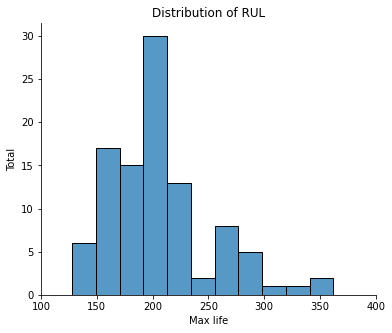

In [15]:
# display how the life of the machines is distributed
max_unit_life = df_train_cleaned.groupby('unit_number')['time'].max()

f, ax = plt.subplots(figsize=(6, 5))
sns.set_color_codes("pastel")
sns.histplot(data=max_unit_life, palette='hls',
            label="Total")
ax.set(xlim=(100, 400), title='Distribution of RUL', ylabel="Total",
       xlabel="Max life")
sns.despine(top=True, right=True)

### Which component has the highest RUL?
- Component 69 has the highest RUL = 362.

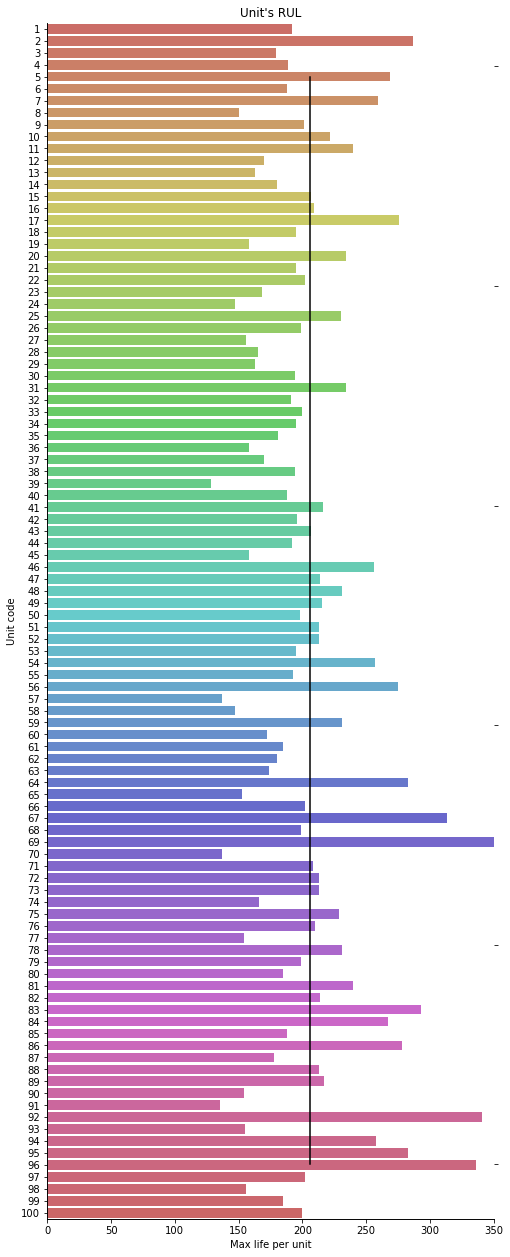

In [16]:
df_max_unit_life = max_unit_life.reset_index()
df_max_unit_life.columns = ['unit','max_life']
df_max_unit_life['mean'] = df_max_unit_life.max_life.mean()
df_max_unit_life['unit'] = df_max_unit_life['unit'].astype(str) 

f, ax1 = plt.subplots(figsize=(8, 22))
sns.barplot(x="max_life", y="unit", data=df_max_unit_life,
            label="Total", palette='hls', ax=ax1)
ax1.set(xlim=(0, 350), title="Unit's RUL", ylabel="Unit code",
       xlabel="Max life per unit")

ax2 = ax1.twinx()
sns.lineplot(x=df_max_unit_life["mean"], y=ax1.get_yticks(), estimator=None, color='black', linewidth =1.5, ax=ax2)
ax2.set(yticklabels=[])

sns.despine(top=True, right=True)

### Which features are most correlated with RUL?
From the correlation matrix, we can conclude that:
- Sensors 2, 3, 4, 11, 15 and 17 have a high negative correlation with our target variable;
- Sensors 7 and 12 have a high positive correlation with our target variable;
- Operational setting seens to not affect so much our target variable.

<AxesSubplot:>

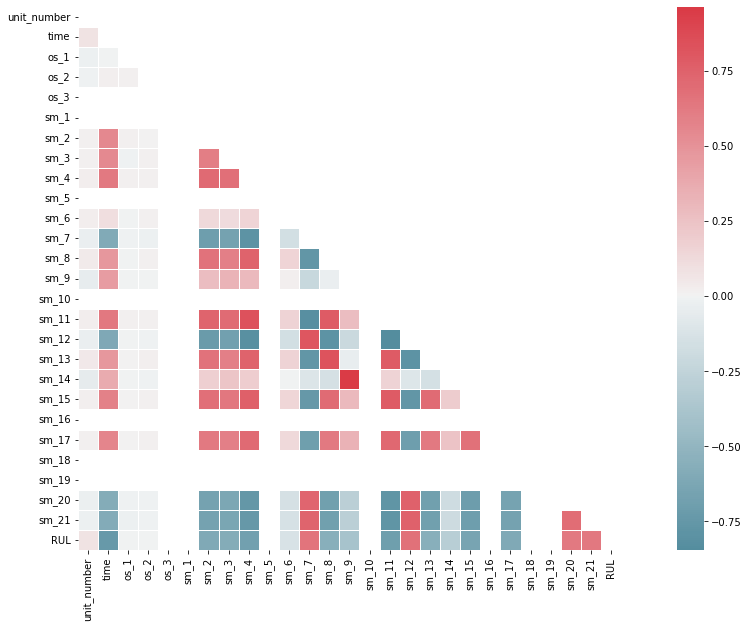

In [17]:
# plotting correlation matix
corr = df_train_cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.8)

In [18]:
corr['RUL'].sort_values()

time          -0.736241
sm_11         -0.696228
sm_4          -0.678948
sm_15         -0.642667
sm_2          -0.606484
sm_17         -0.606154
sm_3          -0.584520
sm_8          -0.563968
sm_13         -0.562569
sm_9          -0.390102
sm_14         -0.306769
sm_6          -0.128348
os_1          -0.003198
os_2          -0.001948
unit_number    0.078753
sm_20          0.629428
sm_21          0.635662
sm_7           0.657223
sm_12          0.671983
RUL            1.000000
os_3                NaN
sm_1                NaN
sm_5                NaN
sm_10               NaN
sm_16               NaN
sm_18               NaN
sm_19               NaN
Name: RUL, dtype: float64

### How they behavior during RUL decrease?
1. Sensors 1, 5, 10, 16, 18, 19 are constant measurements;

    *- Constant features means that it doens't affect the machine's life.*
    
    
2. A increase on the sensors 3, 4, 8, 9, 11, 13, 14 and 15 values can implify into a tendecy of lowering RUL;
3. A decrease on the sensors 7, 12, 20 and 21 values can implify into a tendecy of lowering RUL.

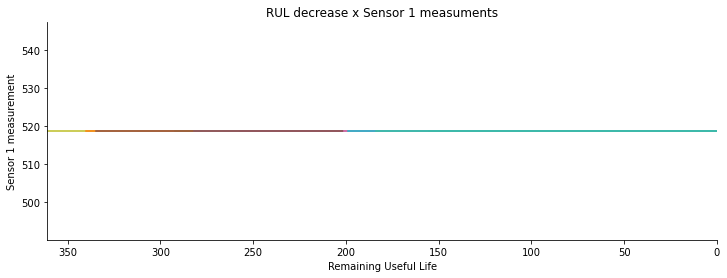

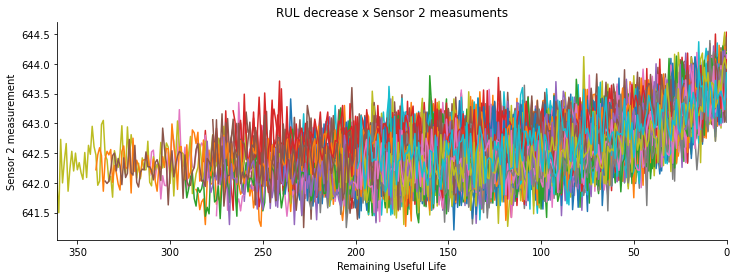

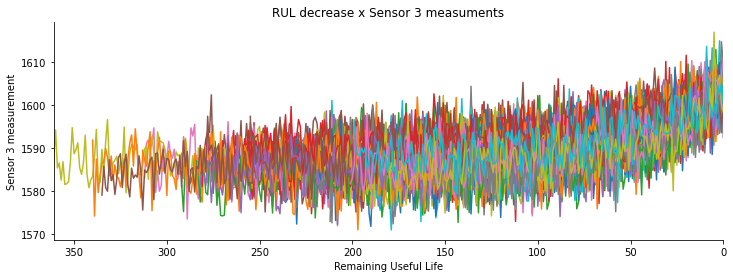

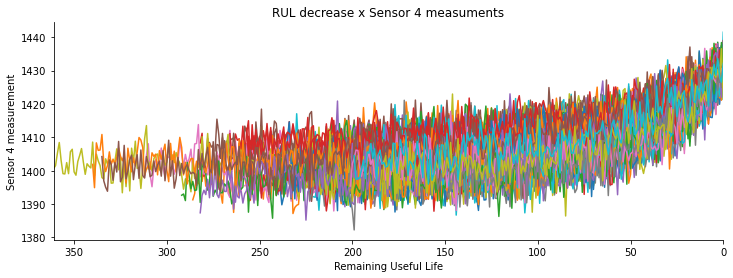

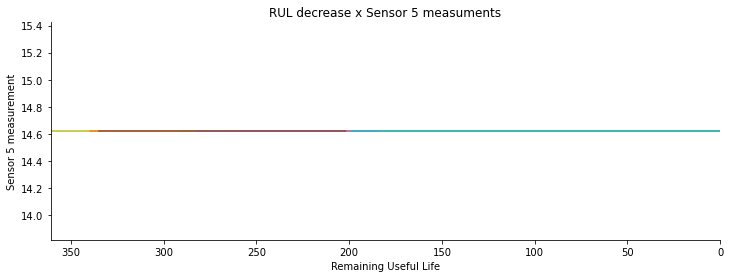

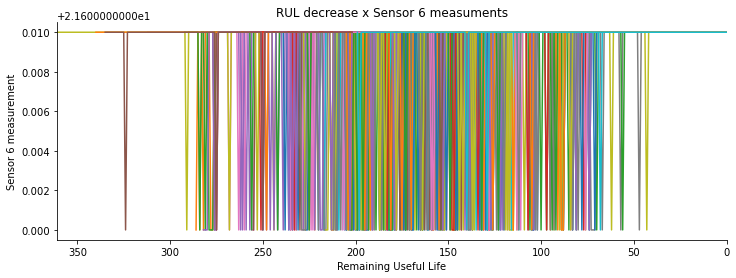

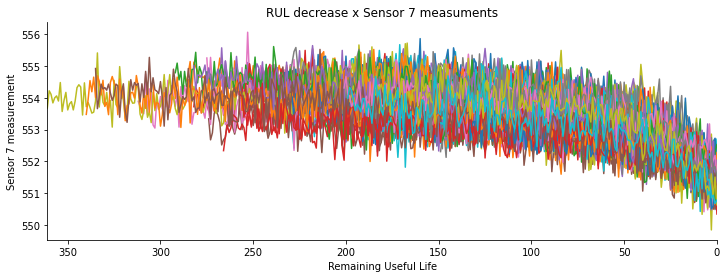

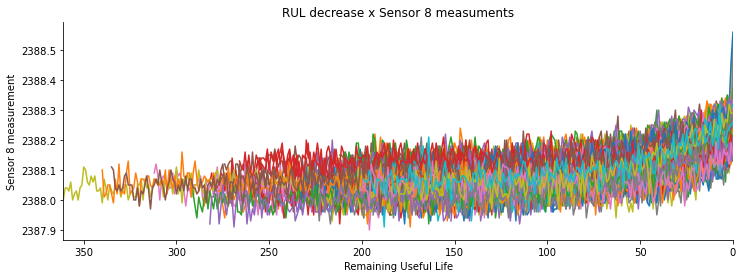

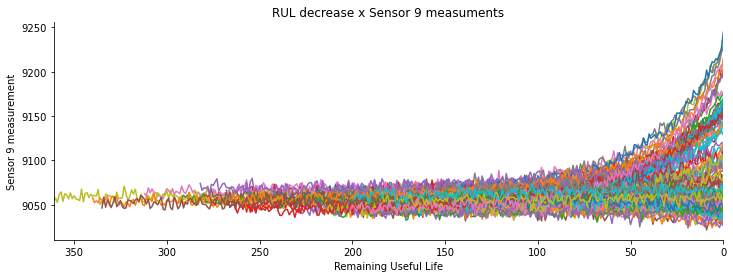

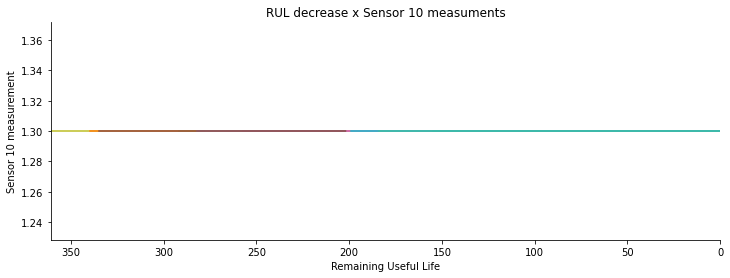

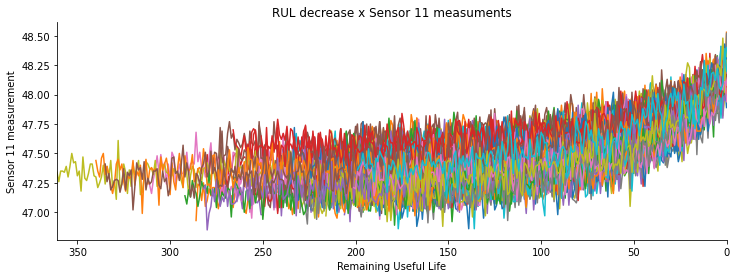

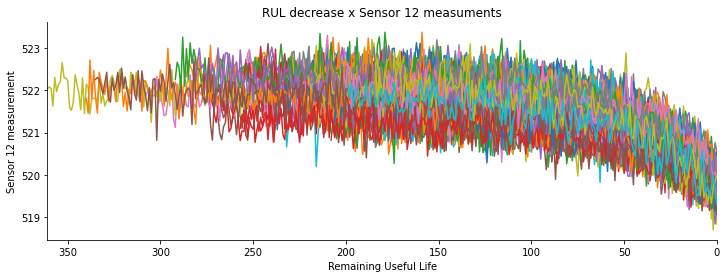

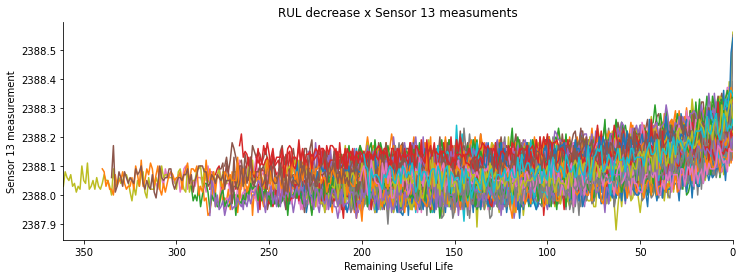

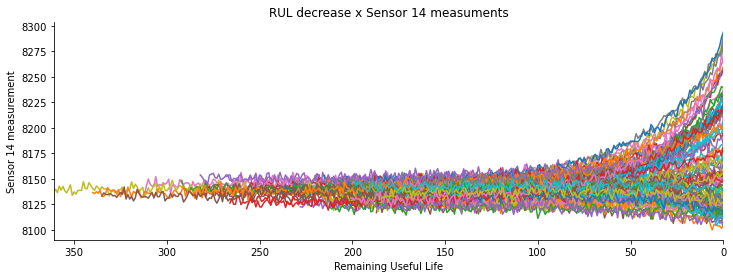

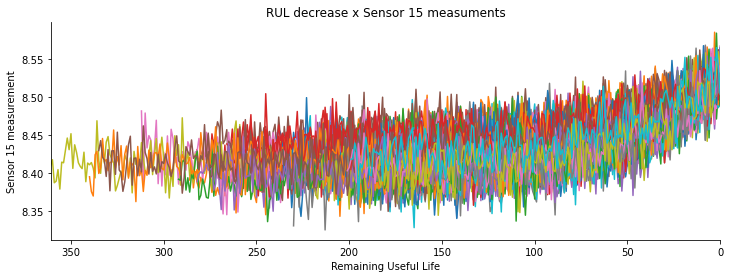

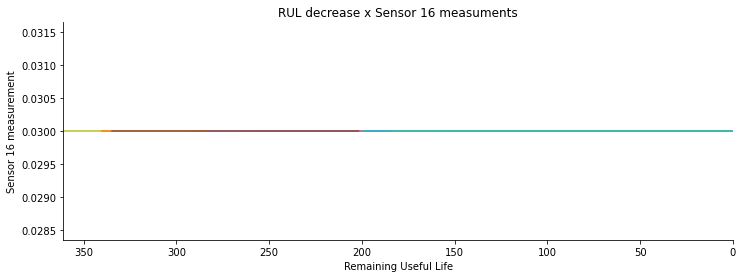

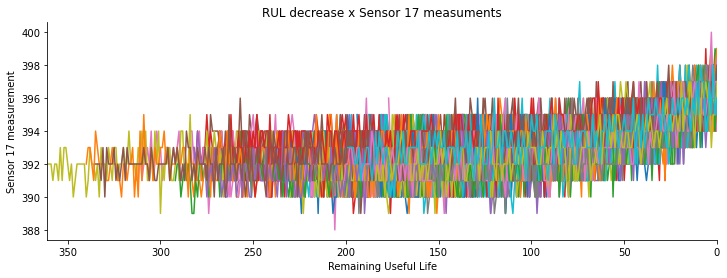

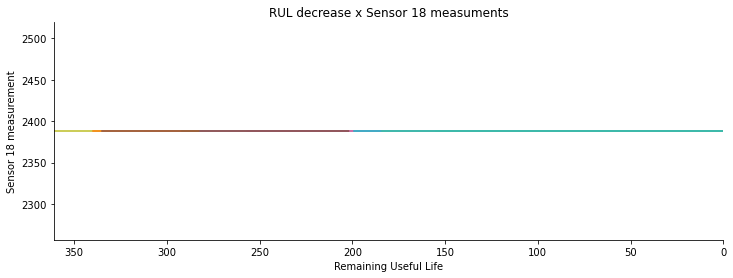

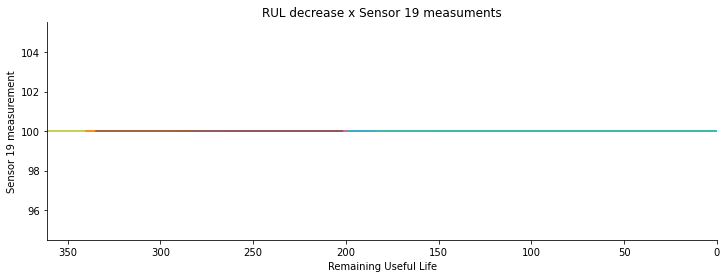

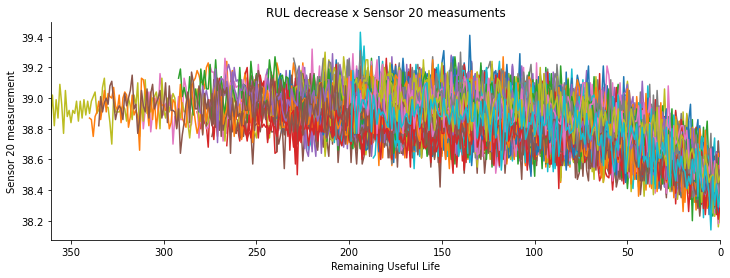

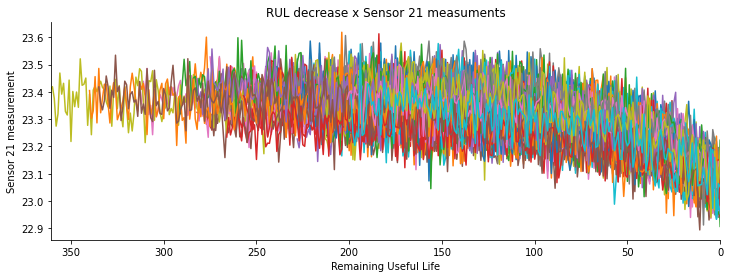

In [19]:
MAX_RUL = df_train_cleaned['RUL'].max()
for i in range(1,22):
    fig, ax = plt.subplots(figsize=(12,4))
    # sns.scatterplot(y=f'sm_{i}', x='RUL', palette='hls', data=df_train_cleaned, ax =ax)   
    for unit_number in df_train_cleaned['unit_number'].unique():
        sns.lineplot(y=f'sm_{i}', x='RUL', palette='hls', data=df_train_cleaned[df_train_cleaned['unit_number']==unit_number], ax=ax)
    ax.set(xlim=(0, MAX_RUL), title=f"RUL decrease x Sensor {i} measuments", ylabel=f"Sensor {i} measurement",
       xlabel="Remaining Useful Life")
    ax.invert_xaxis()
    sns.despine(top=True, right=True)
    
    i += 1

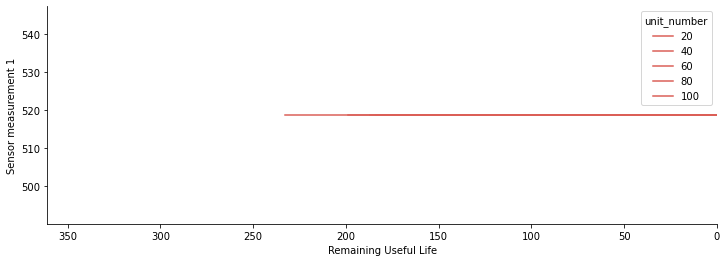

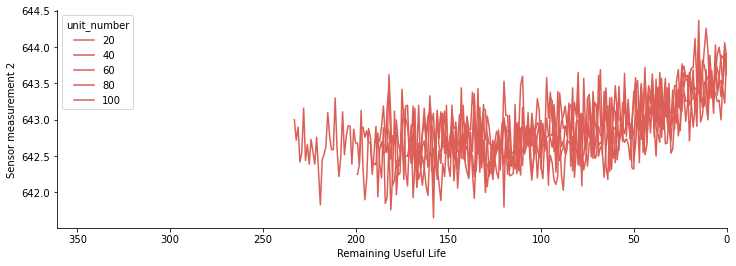

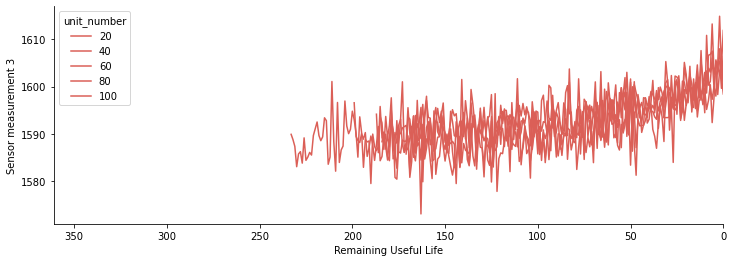

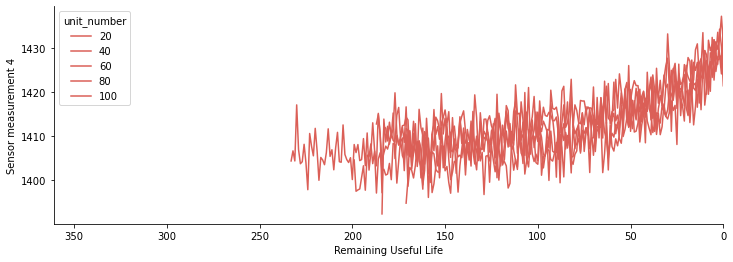

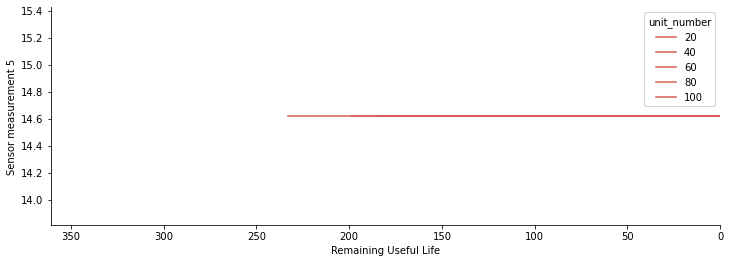

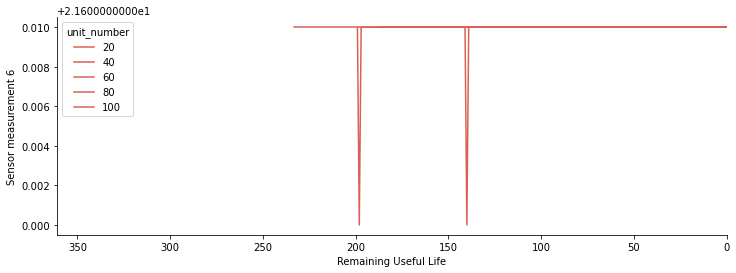

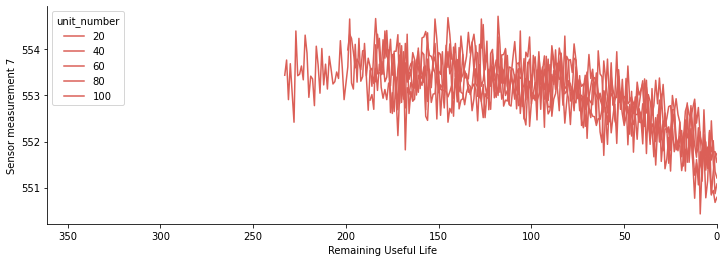

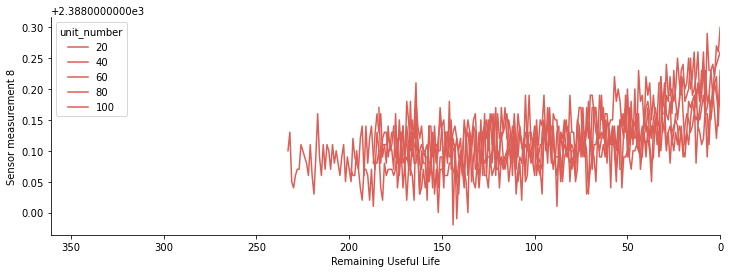

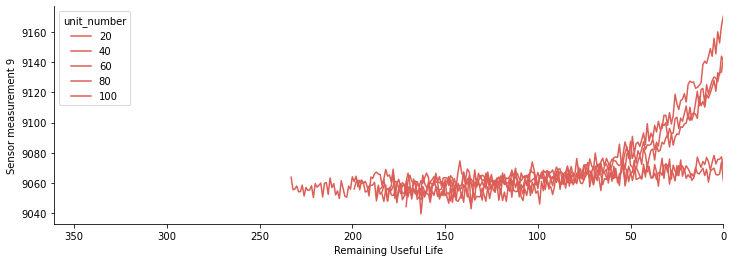

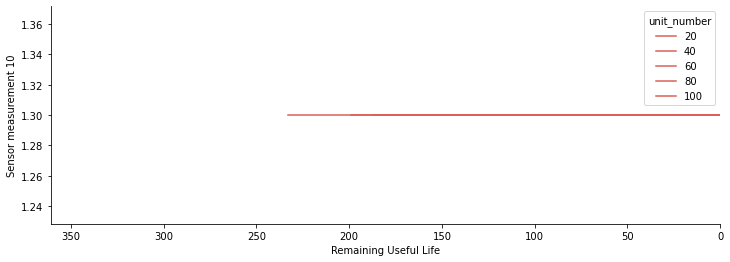

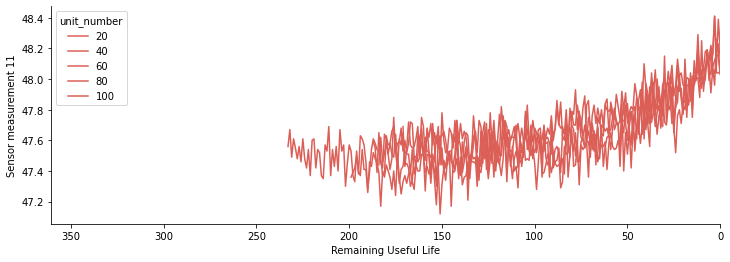

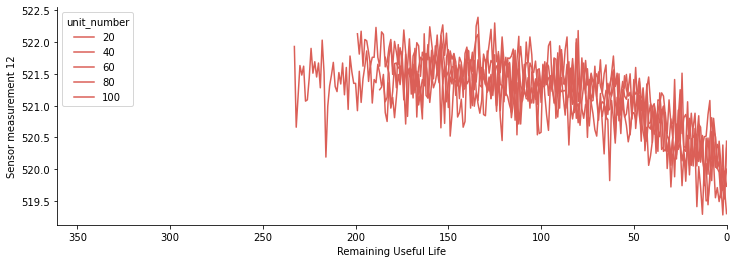

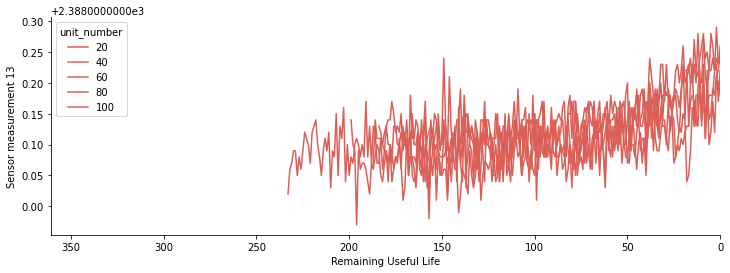

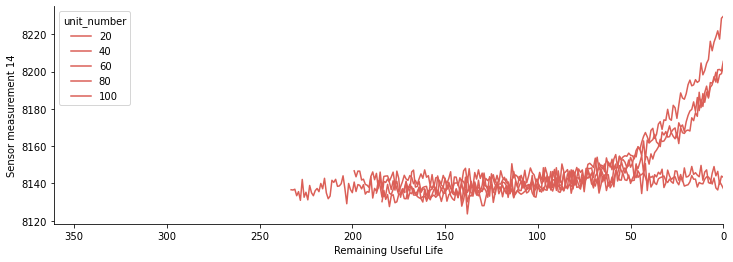

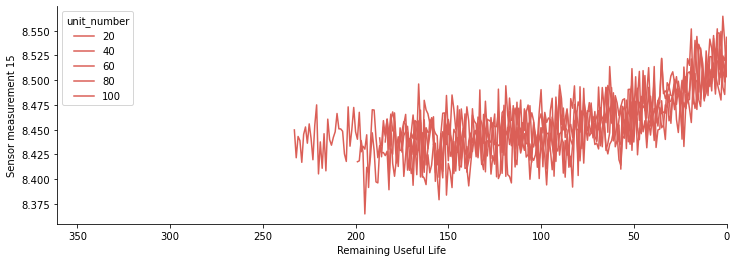

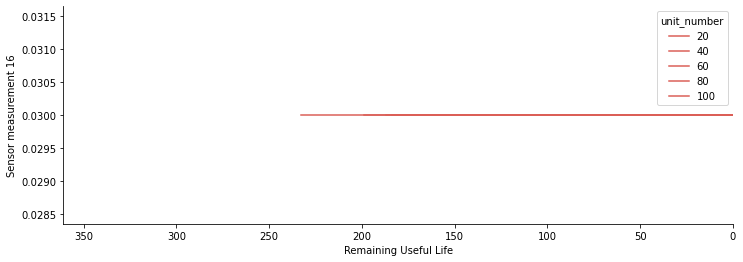

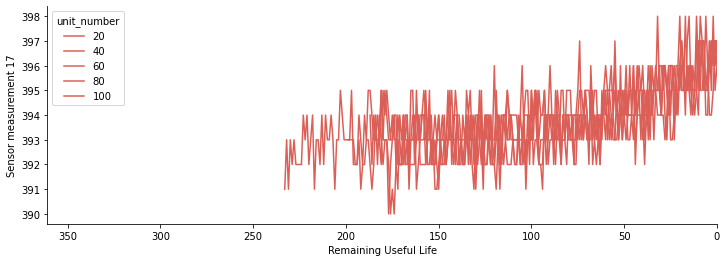

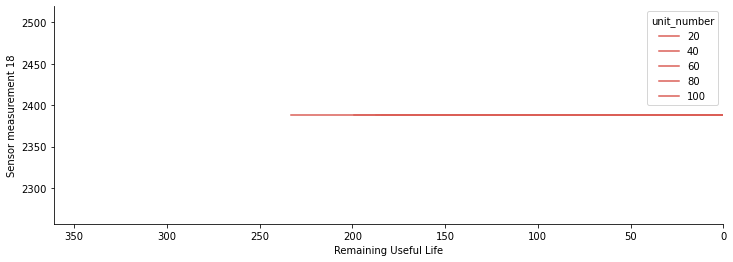

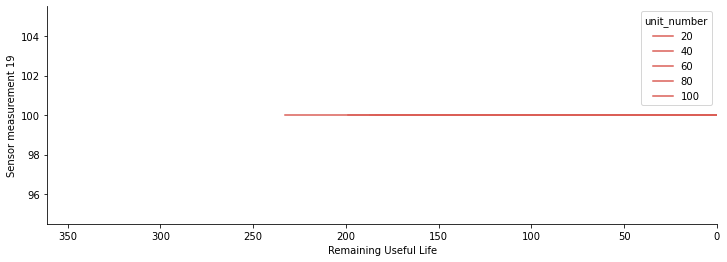

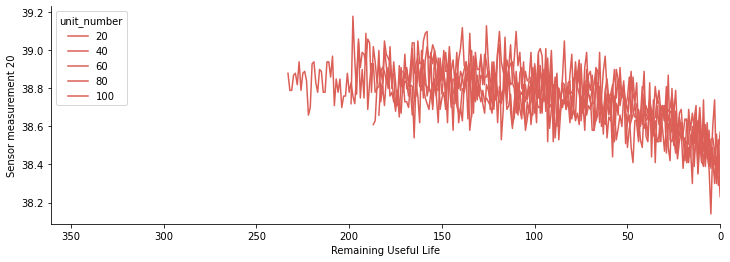

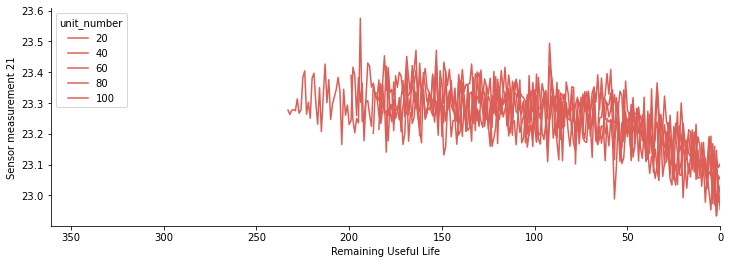

In [20]:
# same plots, but with only 5 units to better visualize the data
df_filtered_units = df_train_cleaned.loc[df_train_cleaned['unit_number']  % 20 == 0]

for i in range(1,22):
    fig, ax = plt.subplots(figsize=(12,4))
    for unit_number in df_filtered_units['unit_number'].unique():
        unit_data = df_train_cleaned.loc[df_train_cleaned['unit_number']  == unit_number]
        sns.lineplot(y=f'sm_{i}', x='RUL', hue='unit_number', palette='hls', data=unit_data, ax=ax)
    ax.set(xlim=(0, MAX_RUL), ylabel=f"Sensor measurement {i}",
       xlabel="Remaining Useful Life")
    ax.invert_xaxis()
    sns.despine(top=True, right=True)
    i += 1

### How are the measurements distribution?
Besides the sensors that have constant values, the others have not equally distributed values and there are outliers.
This distribution could be from the presence of noise in the sensors during measurements.

During the modelling stage, this distribution should be corrected.

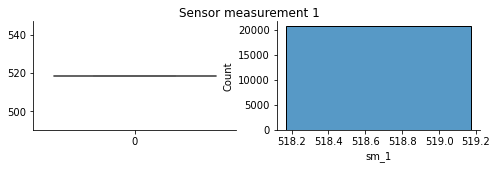

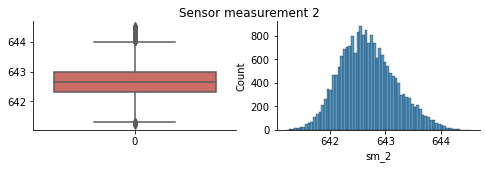

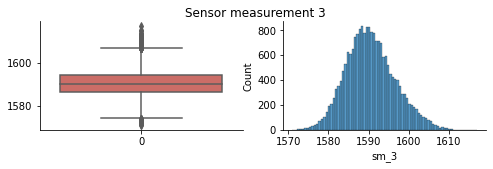

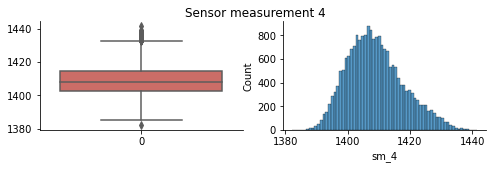

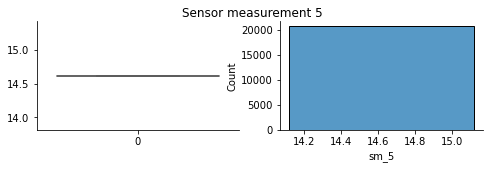

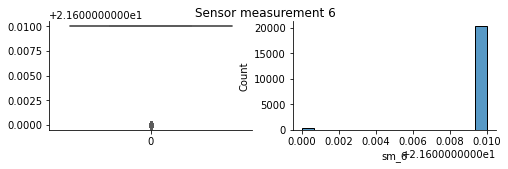

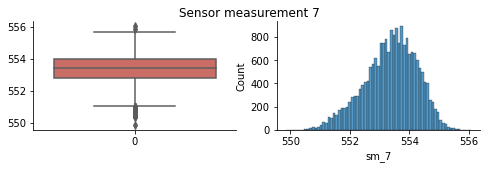

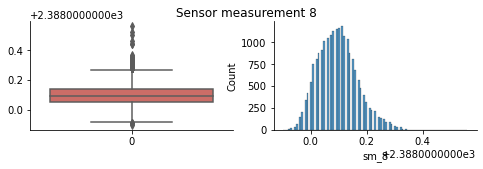

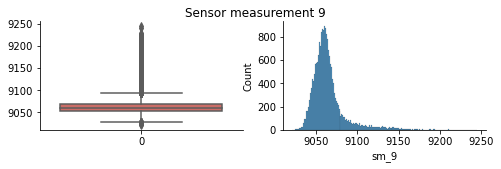

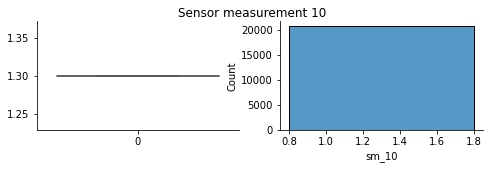

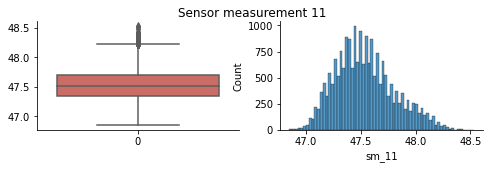

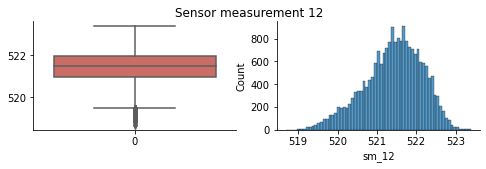

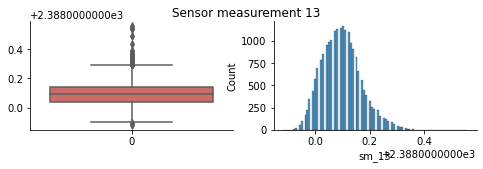

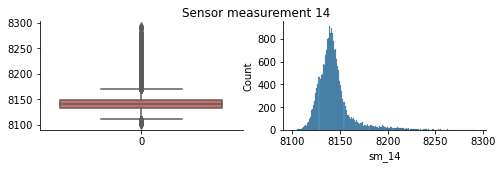

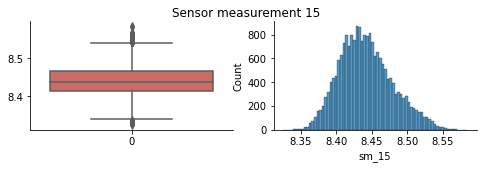

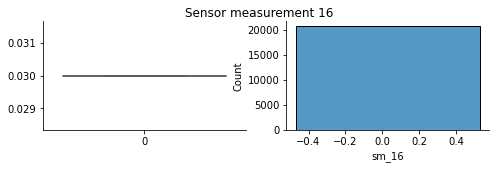

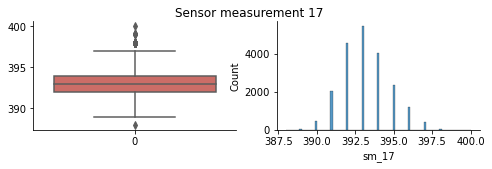

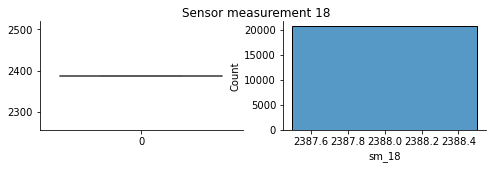

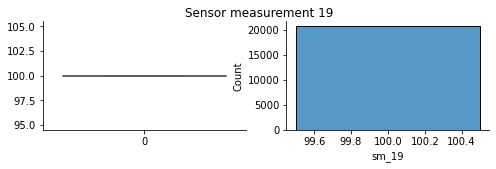

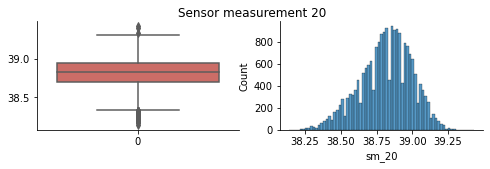

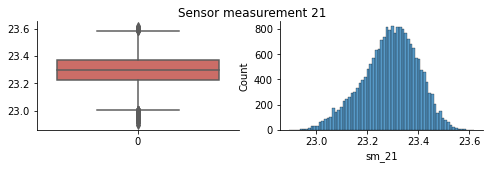

In [21]:
for i in range(1,22):
    f = plt.figure(figsize=(8, 2))
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    sm_data = df_train_cleaned[f'sm_{i}']
    sns.boxplot(data=sm_data, palette='hls',ax=ax1)
    sns.histplot(data=sm_data, palette='hls', ax=ax2)
    f.suptitle(f"Sensor measurement {i}")
    sns.despine(top=True, right=True)
    
    i += 1